# Set Up

In [2]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/")

In [3]:
suppressPackageStartupMessages({
    library(dplyr)
    library(clusterProfiler)
    library(pheatmap)
    library(tidyverse)
    library(venn)
    library(UpSetR)
    library(GenomicRanges)
    library(ChIPseeker)
})

In [12]:
require(TxDb.Hsapiens.UCSC.hg19.knownGene)
txdb = TxDb.Hsapiens.UCSC.hg19.knownGene

# SCOPEC peak in humanBrain V1

In [5]:
V1.RGls <- readRDS("./FINAL_RDS/humanBrain_1K_V1/RG.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")
V1.iPCls <- readRDS("./FINAL_RDS/humanBrain_1K_V1/iPC.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")
V1.eNls <- readRDS("./FINAL_RDS/humanBrain_1K_V1/eN.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")
V1.iNls <- readRDS("./FINAL_RDS/humanBrain_1K_V1/iN.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")

In [6]:
V1.P1KLs <- list(RG=V1.RGls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     iPC=V1.iPCls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     eN=V1.eNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     iN=V1.iNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique())

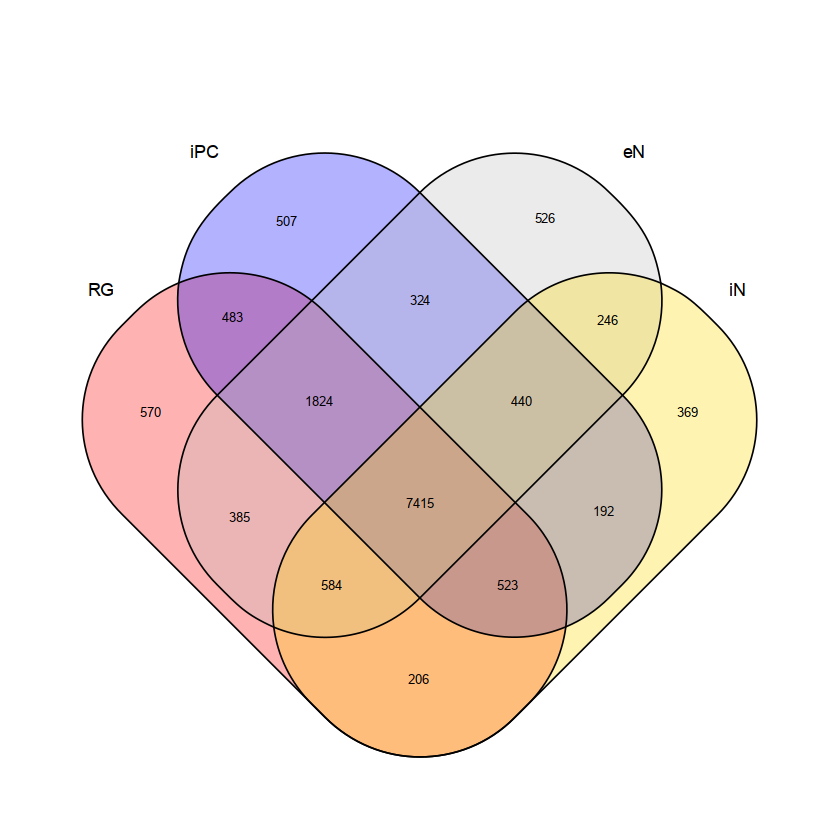

In [30]:
venn(P1KLs,zcolor=c("red","blue","gray","gold"),box=F)

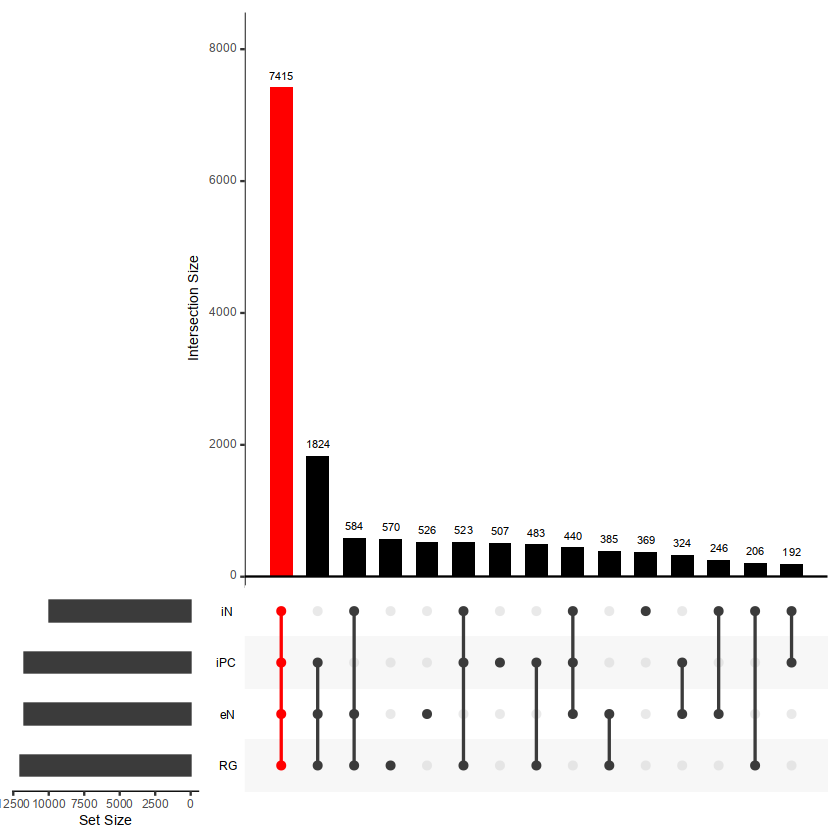

In [14]:
upset(fromList(P1KLs), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "red", active = T))) 

In [15]:
#write.table(RGls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_V1/RG.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iPCls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_V1/iPC.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(eNls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_V1/eN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iNls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_V1/iN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)

In [16]:
#write.table(RGls$`Intron `,"./FINAL_res_files/humanBrain_1K_V1/RG.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iPCls$`Intron `,"./FINAL_res_files/humanBrain_1K_V1/iPC.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(eNls$`Intron `,"./FINAL_res_files/humanBrain_1K_V1/eN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iNls$`Intron `,"./FINAL_res_files/humanBrain_1K_V1/iN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)

In [17]:
DI.ls <- list.files("./FINAL_res_files/humanBrain_1K_V1/",pattern="mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic.inallMergeAddNR")

In [18]:
IN.ls <- list.files("./FINAL_res_files/humanBrain_1K_V1/",pattern="mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron.inallMergeAddNR")

In [10]:
DI <- lapply(paste0("./FINAL_res_files/humanBrain_1K_PFC/",DI.ls),read.table)
IN <- lapply(paste0("./FINAL_res_files/humanBrain_1K_PFC/",IN.ls),read.table)

In [11]:
names(DI) <- gsub(".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic.inallMergeAddNR","",DI.ls)
names(IN) <- gsub(".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron.inallMergeAddNR","",IN.ls)

In [12]:
DIforveen <- list(RG=DI$RG$V11 %>% unique(),
     iPC=DI$iPC$V11 %>% unique(),
     eN=DI$eN$V11 %>% unique(),
     iN=DI$iN$V11 %>% unique())

In [13]:
INforveen <- list(
     RG=IN$RG$V10 %>% unique(),
     iPC=IN$iPC$V10 %>% unique(),
     eN=IN$eN$V10 %>% unique(),
     iN=IN$iN$V10 %>% unique())

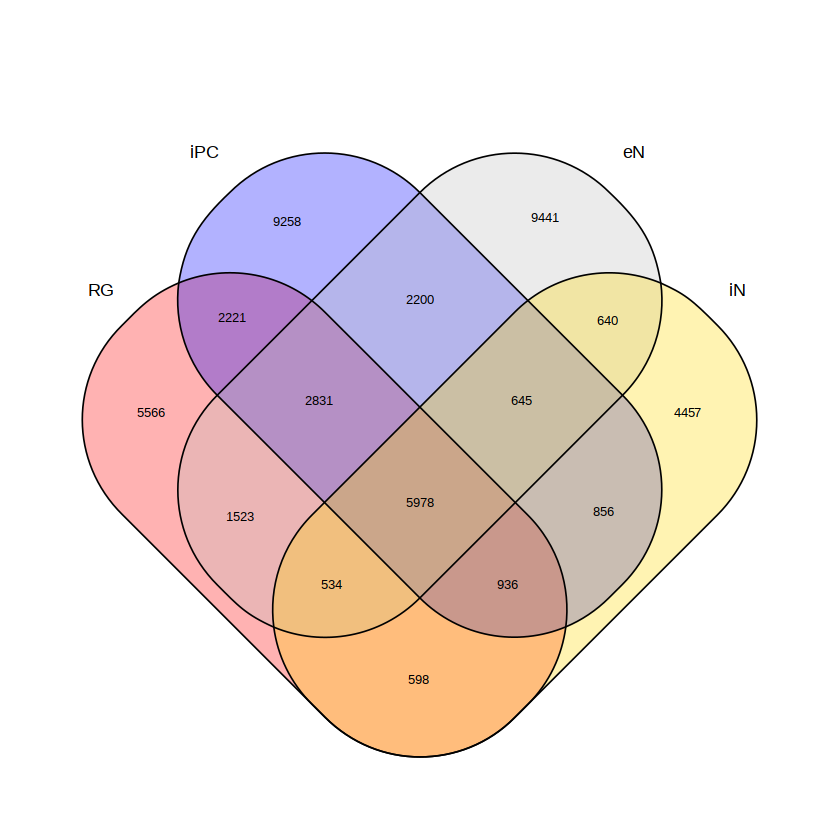

In [14]:
venn(DIforveen,zcolor=c("red","blue","gray","gold"),box=F)

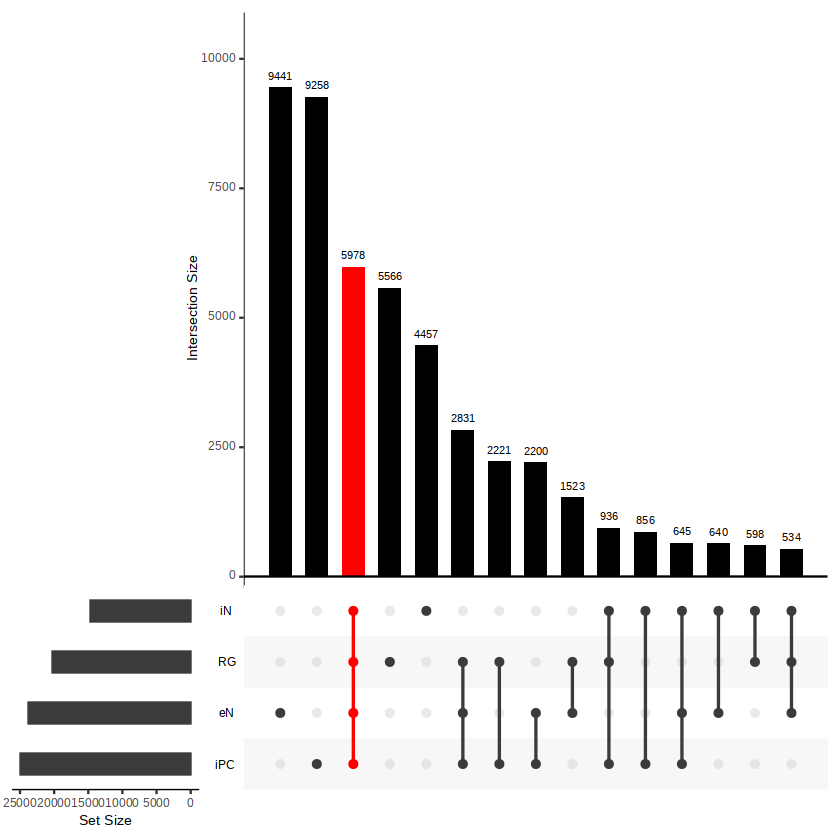

In [15]:
upset(fromList(DIforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "red", active = T))) 

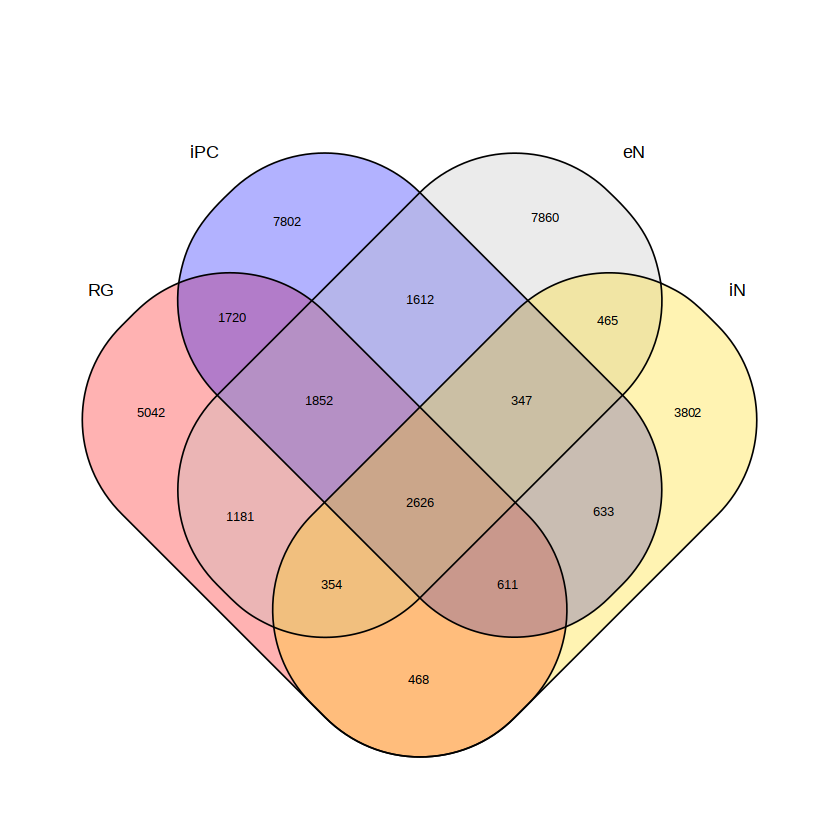

In [16]:
venn(INforveen,zcolor=c("red","blue","gray","gold"),box=F)

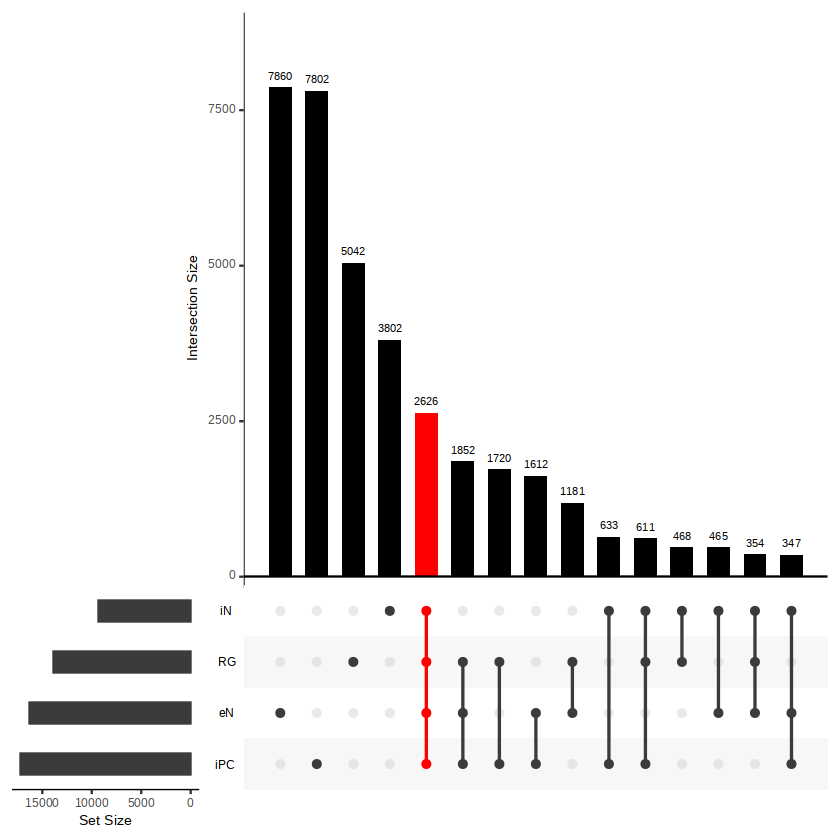

In [17]:
upset(fromList(INforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "red", active = T))) 

# SCOPEC peak in humanBrain PFC

In [7]:
PFC.RGls <- readRDS("./FINAL_RDS/humanBrain_1K_PFC/RG.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")
PFC.iPCls <- readRDS("./FINAL_RDS/humanBrain_1K_PFC/iPC.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")
PFC.eNls <- readRDS("./FINAL_RDS/humanBrain_1K_PFC/eN.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")
PFC.iNls <- readRDS("./FINAL_RDS/humanBrain_1K_PFC/iN.mergeTocall.peak.FDR.filtered.narrowPeaks.ChipseekerAnno.list")

In [8]:
PFC.P1KLs <- list(RG=PFC.RGls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     iPC=PFC.iPCls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     eN=PFC.eNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     iN=PFC.iNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique())

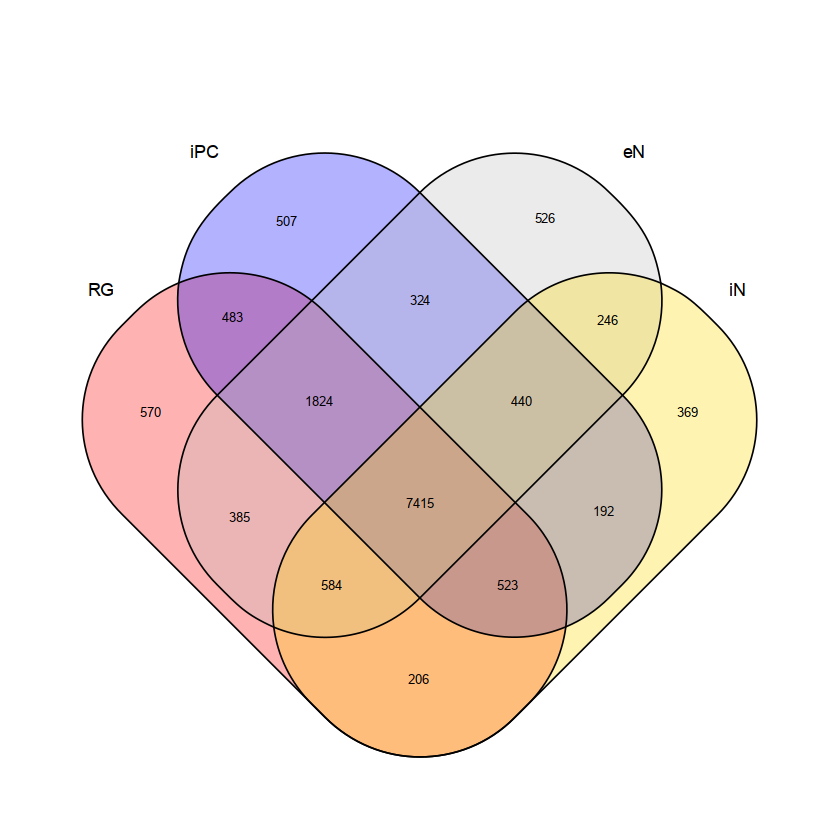

In [32]:
venn(P1KLs,zcolor=c("red","blue","gray","gold"),box=F)

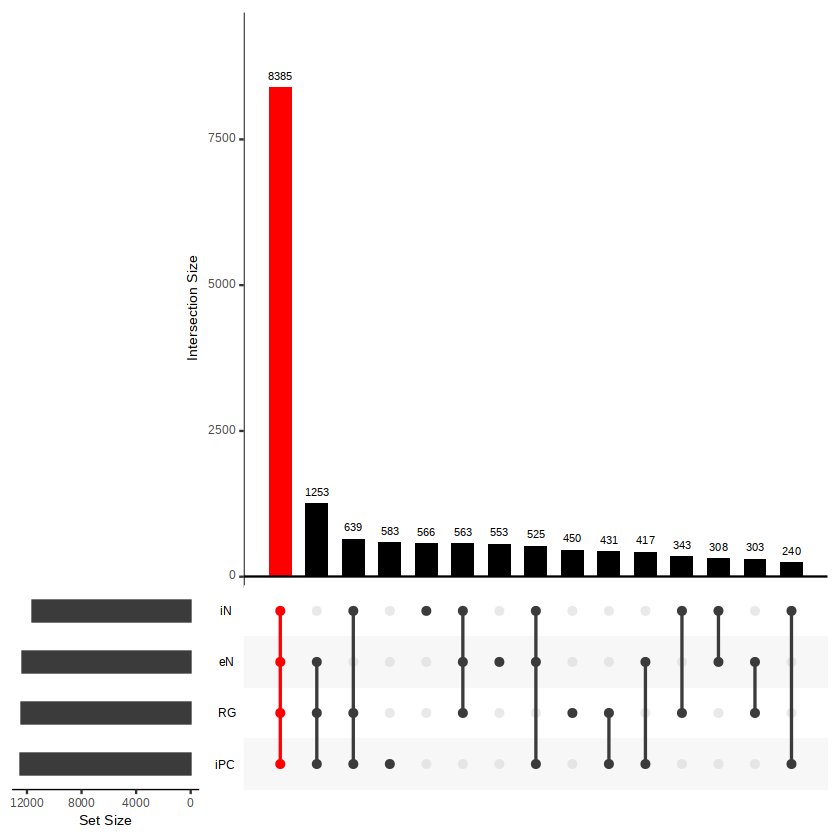

In [7]:
upset(fromList(P1KLs), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "red", active = T))) 

In [32]:
#write.table(RGls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_PFC/RG.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iPCls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_PFC/iPC.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(eNls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_PFC/eN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iNls$`Distal Intergenic`,"./FINAL_res_files/humanBrain_1K_PFC/iN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)

In [33]:
#write.table(RGls$`Intron `,"./FINAL_res_files/humanBrain_1K_PFC/RG.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iPCls$`Intron `,"./FINAL_res_files/humanBrain_1K_PFC/iPC.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(eNls$`Intron `,"./FINAL_res_files/humanBrain_1K_PFC/eN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
#write.table(iNls$`Intron `,"./FINAL_res_files/humanBrain_1K_PFC/iN.mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)

In [8]:
DI.ls <- list.files("./FINAL_res_files/humanBrain_1K_PFC/",pattern="mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic.inallMergeAddNR")

In [9]:
IN.ls <- list.files("./FINAL_res_files/humanBrain_1K_PFC/",pattern="mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron.inallMergeAddNR")

In [10]:
DI <- lapply(paste0("./FINAL_res_files/humanBrain_1K_PFC/",DI.ls),read.table)
IN <- lapply(paste0("./FINAL_res_files/humanBrain_1K_PFC/",IN.ls),read.table)

In [11]:
names(DI) <- gsub(".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic.inallMergeAddNR","",DI.ls)
names(IN) <- gsub(".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron.inallMergeAddNR","",IN.ls)

In [12]:
DIforveen <- list(RG=DI$RG$V11 %>% unique(),
     iPC=DI$iPC$V11 %>% unique(),
     eN=DI$eN$V11 %>% unique(),
     iN=DI$iN$V11 %>% unique())

In [13]:
INforveen <- list(
     RG=IN$RG$V10 %>% unique(),
     iPC=IN$iPC$V10 %>% unique(),
     eN=IN$eN$V10 %>% unique(),
     iN=IN$iN$V10 %>% unique())

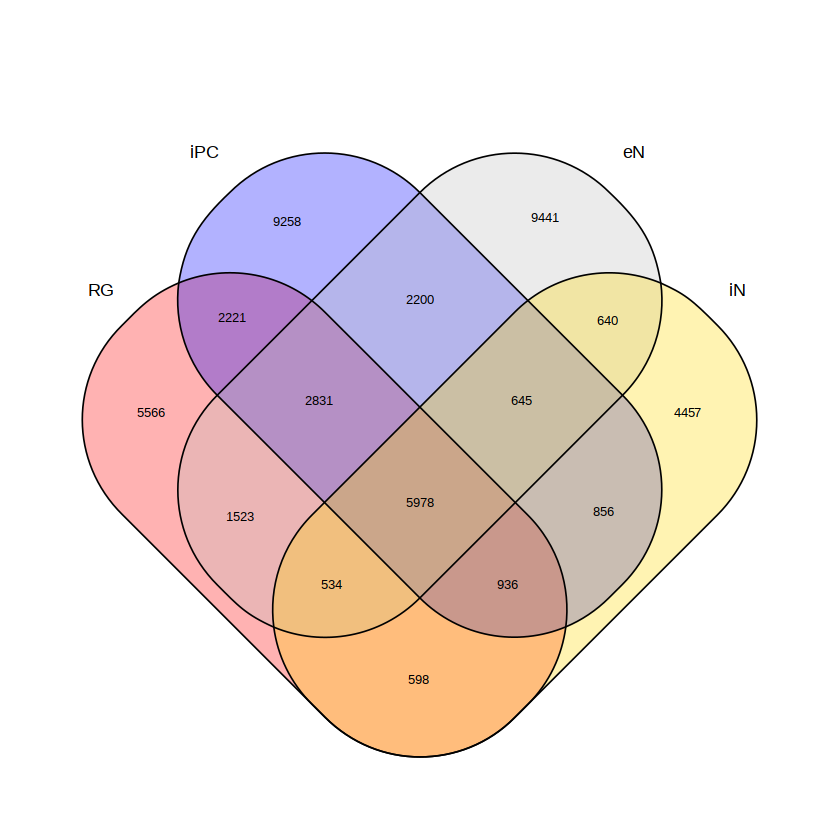

In [14]:
venn(DIforveen,zcolor=c("red","blue","gray","gold"),box=F)

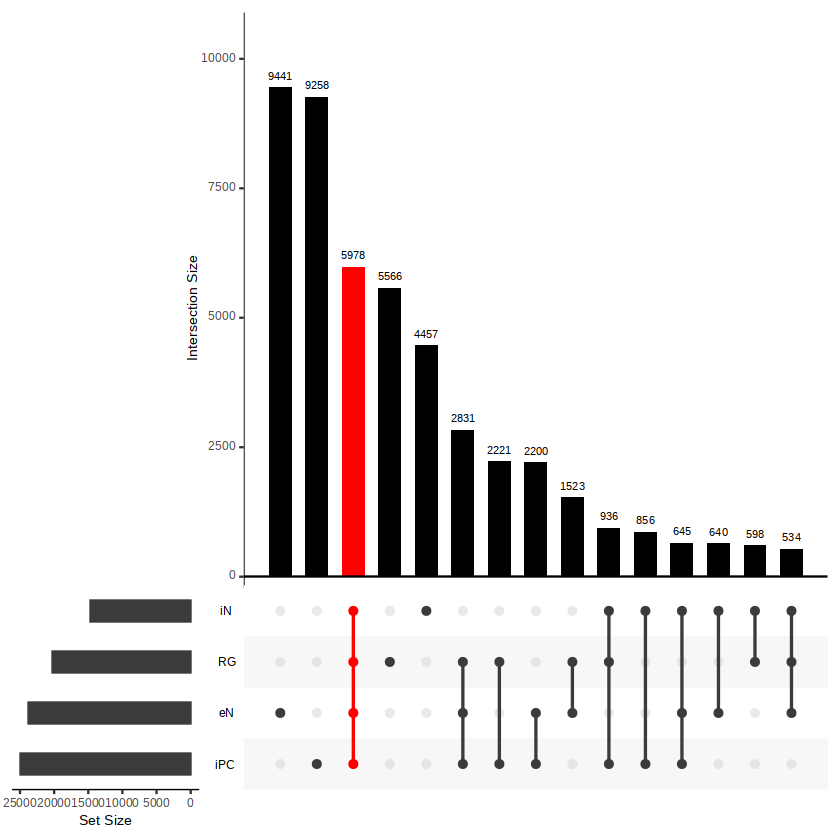

In [15]:
upset(fromList(DIforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "red", active = T))) 

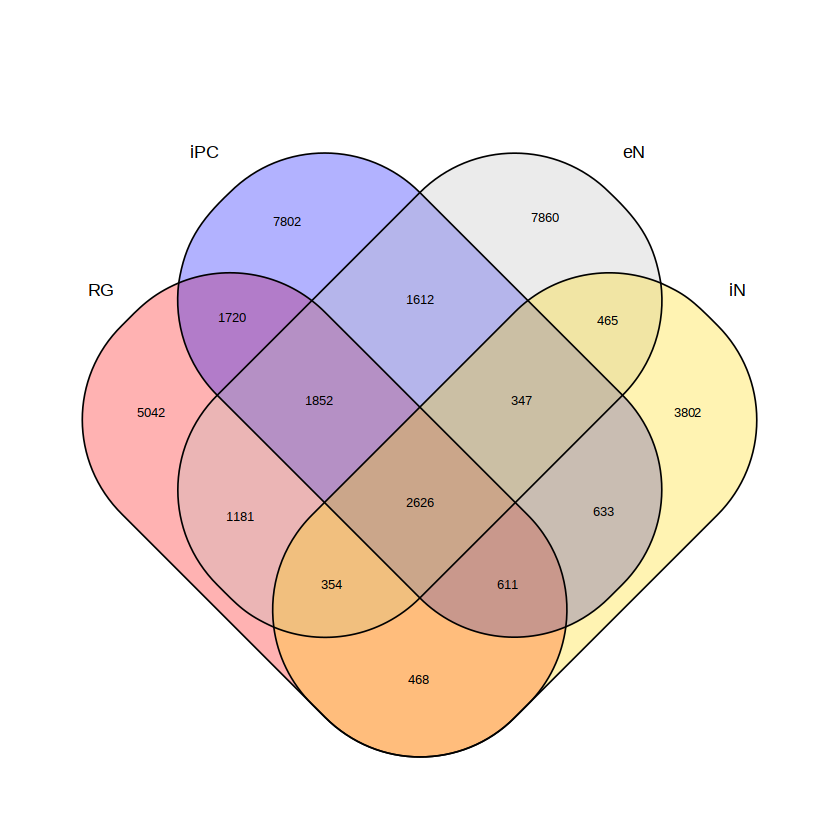

In [16]:
venn(INforveen,zcolor=c("red","blue","gray","gold"),box=F)

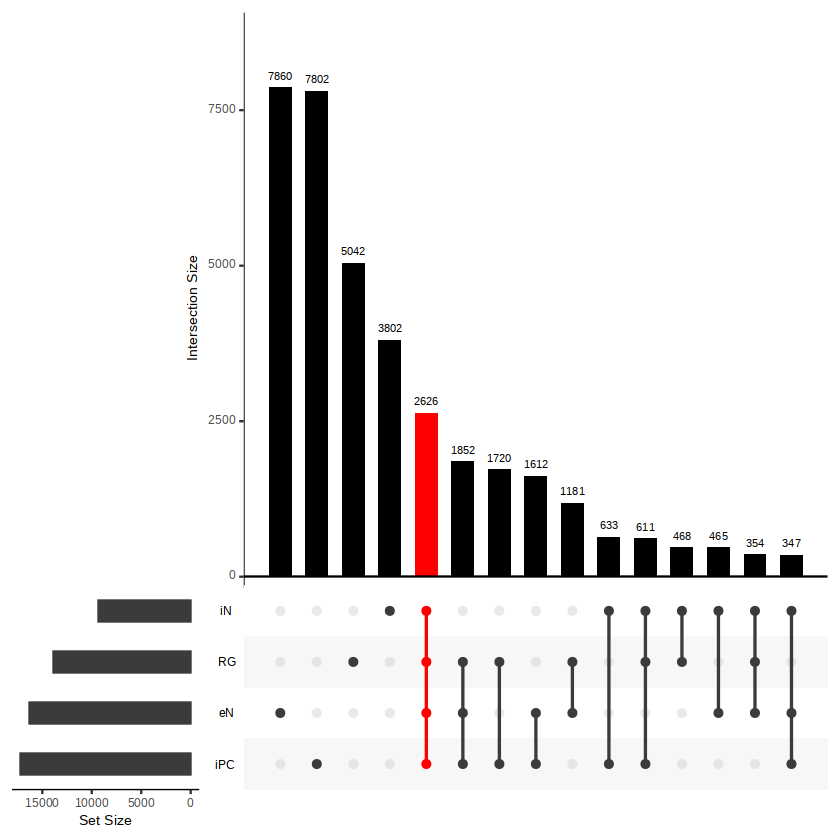

In [17]:
upset(fromList(INforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "red", active = T))) 

# ShenYin ATAC-seq data (mm10, FDR)

In [22]:
ATAC <- lapply(paste0("./publicdata/human-shenyin-ATAC/",
                      list.files("./publicdata/human-shenyin-ATAC/",pattern=".ATAC-seq.narrowPeak$")),read.table)

In [23]:
names(ATAC) <- gsub(".ATAC-seq.narrowPeak","",list.files("./publicdata/human-shenyin-ATAC/",pattern=".ATAC-seq.narrowPeak$"))

In [27]:
source("/lustre/user/liclab/jialm/Project/SCOPEC/utils/myFunction.R")

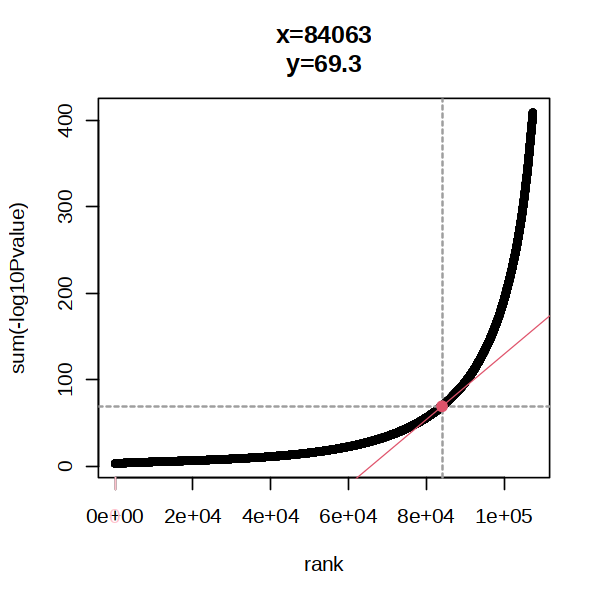

In [34]:
options(repr.plot.width = 5, repr.plot.height = 5)
cutRG=calculate_cutoff(ATAC[[1]] %>% filter(V9 <=409) %>% .$V9)$absolute
#cutiPC=calculate_cutoff(ATAC[[2]] %>% .$V9)$absolute
#cuteN=calculate_cutoff(ATAC[[3]] %>% .$V9)$absolute
#cutiN=calculate_cutoff(ATAC[[4]] %>% .$V9)$absolute

# ShenYin ATAC-seq data

In [18]:
ATAC <- lapply(paste0("./publicdata/human-shenyin-ATAC/",
                      list.files("./publicdata/human-shenyin-ATAC/",pattern="shenyin-ATAC-liftOver-hg19.bed$")),read.table)

In [19]:
names(ATAC) <- gsub("-shenyin-ATAC-liftOver-hg19.bed","",list.files("./publicdata/human-shenyin-ATAC/",pattern="shenyin-ATAC-liftOver-hg19.bed$"))

In [20]:
ATAC.gr <- lapply(ATAC,function(idx){
    dat <- idx %>% makeGRangesFromDataFrame(.,seqnames.field = "V1",start.field = "V2",end.field = "V3")
    return(dat)
})

In [36]:
names(ATAC)

[1] "eN"  "iN"  "IPC" "RG"

In [41]:
ATAC.gr[[3]]

GRanges object with 96087 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]    chr17   22020463-22020983      *
      [2]     chr1       569158-569658      *
      [3]     chr4   37687885-37688748      *
      [4]     chr5 108083807-108085329      *
      [5]     chr5 108745514-108746524      *
      ...      ...                 ...    ...
  [96083]     chr4   43914711-43915233      *
  [96084]     chr3 129271915-129272415      *
  [96085]     chr5 121450947-121451447      *
  [96086]     chr4 181261689-181262189      *
  [96087]     chr5   45398288-45398788      *
  -------
  seqinfo: 27 sequences from an unspecified genome; no seqlengths

In [53]:
ATAC.peamAnno <- lapply(ATAC.gr,function(idx){
    annotatePeak(idx, 
                 tssRegion=c(-3000, 3000),
                 TxDb=txdb, annoDb="org.Hs.eg.db")
})

>> preparing features information...		 2022-09-22 23时43分52秒 
>> identifying nearest features...		 2022-09-22 23时43分53秒 
>> calculating distance from peak to TSS...	 2022-09-22 23时43分56秒 
>> assigning genomic annotation...		 2022-09-22 23时43分56秒 
>> adding gene annotation...			 2022-09-22 23时44分21秒 


载入需要的程辑包：org.Hs.eg.db



'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-09-22 23时44分22秒 
>> done...					 2022-09-22 23时44分22秒 
>> preparing features information...		 2022-09-22 23时44分23秒 
>> identifying nearest features...		 2022-09-22 23时44分23秒 
>> calculating distance from peak to TSS...	 2022-09-22 23时44分25秒 
>> assigning genomic annotation...		 2022-09-22 23时44分25秒 
>> adding gene annotation...			 2022-09-22 23时44分32秒 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-09-22 23时44分32秒 
>> done...					 2022-09-22 23时44分32秒 
>> preparing features information...		 2022-09-22 23时44分33秒 
>> identifying nearest features...		 2022-09-22 23时44分33秒 
>> calculating distance from peak to TSS...	 2022-09-22 23时44分35秒 
>> assigning genomic annotation...		 2022-09-22 23时44分35秒 
>> adding gene annotation...			 2022-09-22 23时44分39秒 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-09-22 23时44分39秒 
>> done...					 2022-09-22 23时44分39秒 
>> preparing features information...		 2022-09-22 23时44分40秒 
>> identifying nearest features...		 2022-09-22 23时44分40秒 
>> calculating distance from peak to TSS...	 2022-09-22 23时44分43秒 
>> assigning genomic annotation...		 2022-09-22 23时44分43秒 
>> adding gene annotation...			 2022-09-22 23时44分47秒 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-09-22 23时44分48秒 
>> done...					 2022-09-22 23时44分48秒 


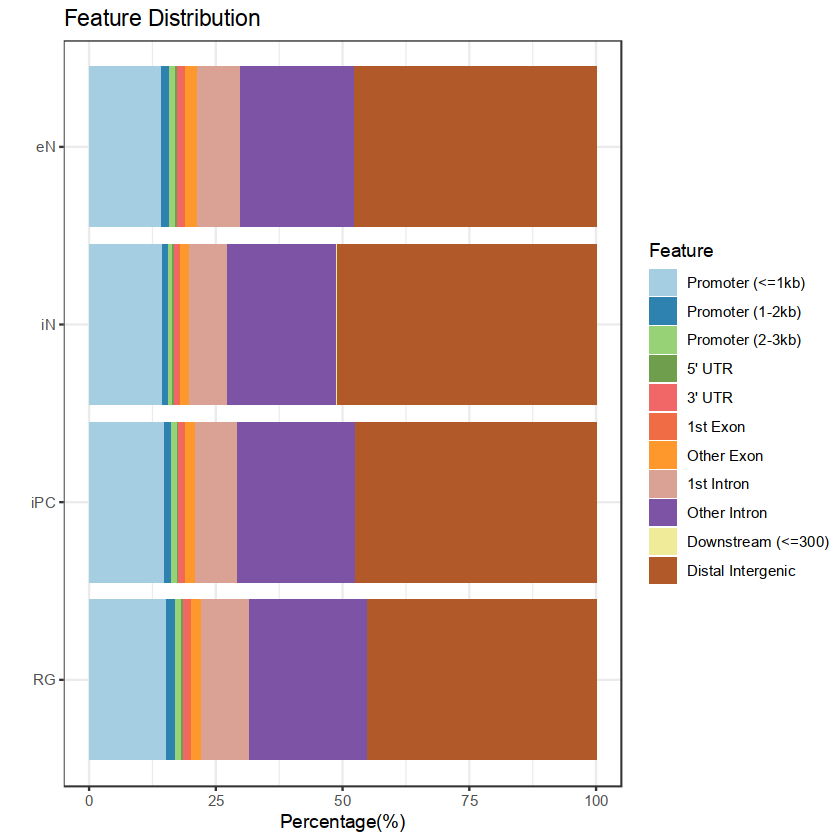

In [54]:
plotAnnoBar(ATAC.peamAnno)

In [55]:
anno.dat <- lapply(1:4,function(idx){
dat <- ATAC.peamAnno[[idx]]@anno %>% as.data.frame() %>% 
dplyr::select(seqnames,start,end,annotation,geneId,distanceToTSS,SYMBOL) 
dat$annotation <- gsub("\\(uc.*","",dat$annotation)
return(dat)
})
names(anno.dat) <- names(ATAC.peamAnno)

In [101]:
#saveRDS(anno.dat$RG,"./publicdata/human-shenyin-ATAC/RG.ATAC-seq.narrowPeak.chipseeker.list.RDS")
#saveRDS(anno.dat$iPC,"./publicdata/human-shenyin-ATAC/iPC.ATAC-seq.narrowPeak.chipseeker.list.RDS")
#saveRDS(anno.dat$eN,"./publicdata/human-shenyin-ATAC/eN.ATAC-seq.narrowPeak.chipseeker.list.RDS")
#saveRDS(anno.dat$iN,"./publicdata/human-shenyin-ATAC/iN.ATAC-seq.narrowPeak.chipseeker.list.RDS")

In [56]:
RG.atac.ls <- split(anno.dat$RG,anno.dat$RG$annotation)
iPC.atac.ls <- split(anno.dat$iPC,anno.dat$iPC$annotation)
eN.atac.ls <- split(anno.dat$eN,anno.dat$eN$annotation)
iN.atac.ls <- split(anno.dat$iN,anno.dat$iN$annotation)

In [57]:
ATAC.plotDF.ls <- list(RG.ATAC=RG.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
           iPC.ATAC=iPC.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
           eN.ATAC=eN.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
           iN.ATAC=iN.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique())

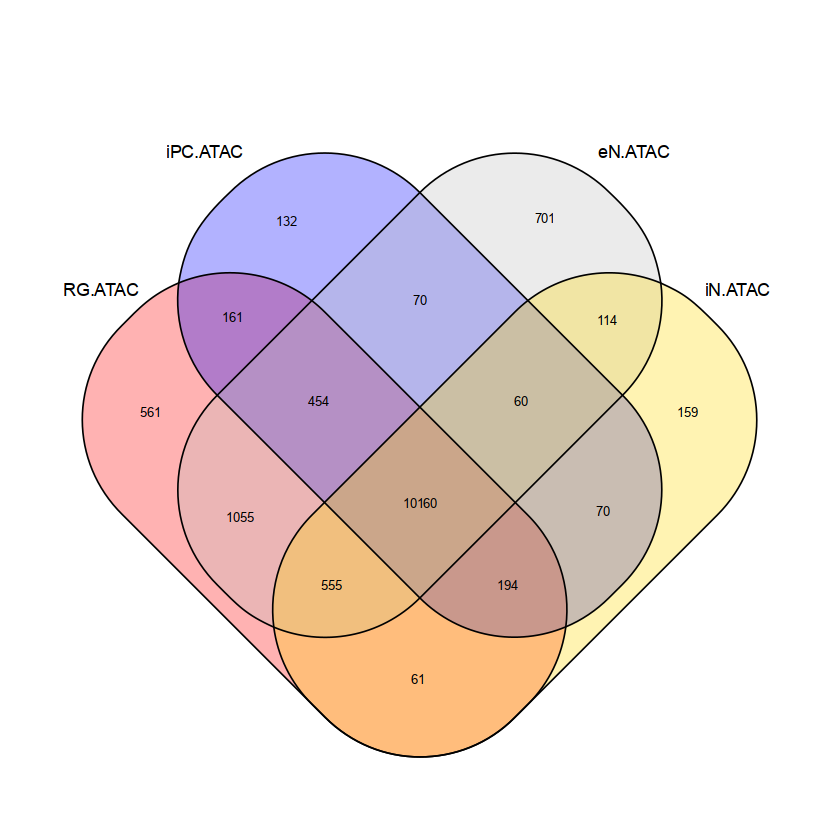

In [58]:
venn::venn(ATAC.plotDF.ls,zcolor=c("red","blue","gray","gold"),box=F)

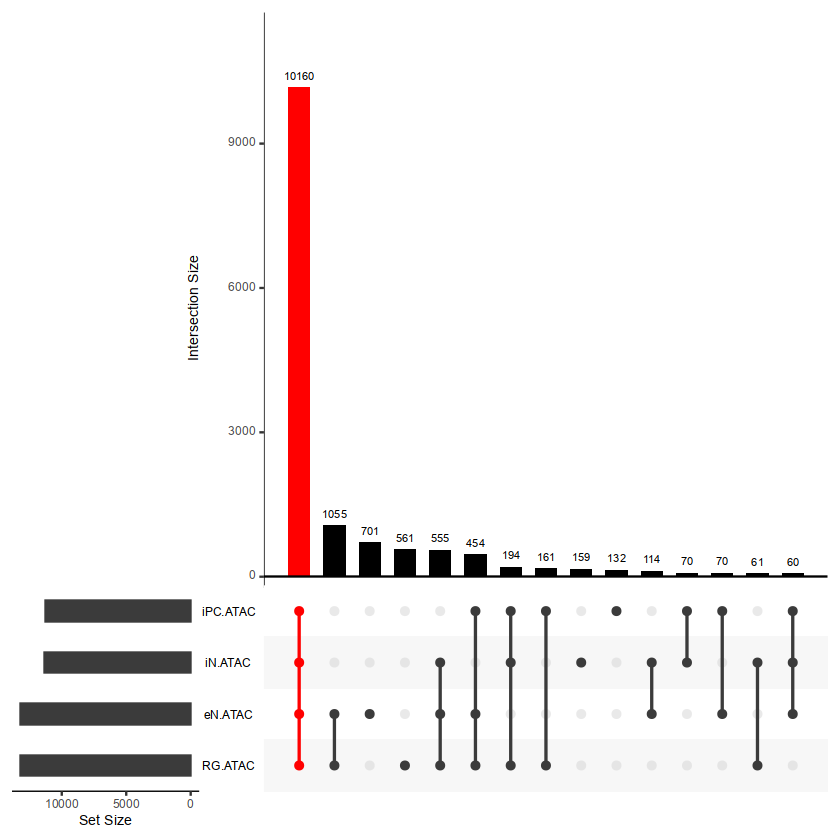

In [60]:
upset(fromList(ATAC.plotDF.ls), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG.ATAC","iPC.ATAC","eN.ATAC","iN.ATAC"), 
                          color = "red", active = T))) 

In [61]:
atacDI.ls <- list.files("./publicdata/human-shenyin-ATAC/",pattern=".hg19peak.FDR.Chipseeker.DistalIntergenic.InallcellTyps.addNR$")
atacIN.ls <- list.files("./publicdata/human-shenyin-ATAC/",pattern=".hg19peak.Chipseeker.Intron.InallcellTyps.addNR$")
atacDI <- lapply(paste0("./publicdata/human-shenyin-ATAC/",atacDI.ls),read.table)
atacIN <- lapply(paste0("./publicdata/human-shenyin-ATAC/",atacIN.ls),read.table)
names(atacDI) <- gsub(".hg19peak.FDR.Chipseeker.DistalIntergenic.InallcellTyps.addNR","",atacDI.ls)
names(atacIN) <- gsub(".hg19peak.Chipseeker.Intron.InallcellTyps.addNR","",atacIN.ls)

In [62]:
atacDIforveen <- list(RG.ATAC=atacDI$RG$V9 %>% unique(),
     iPC.ATAC=atacDI$iPC$V9 %>% unique(),
     eN.ATAC=atacDI$eN$V9 %>% unique(),
     iN.ATAC=atacDI$iN$V9 %>% unique())

In [63]:
atacINforveen <- list(RG.ATAC=atacIN$RG$V8 %>% unique(),
     iPC.ATAC=atacIN$iPC$V8 %>% unique(),
     eN.ATAC=atacIN$eN$V8 %>% unique(),
     iN.ATAC=atacIN$iN$V8 %>% unique())

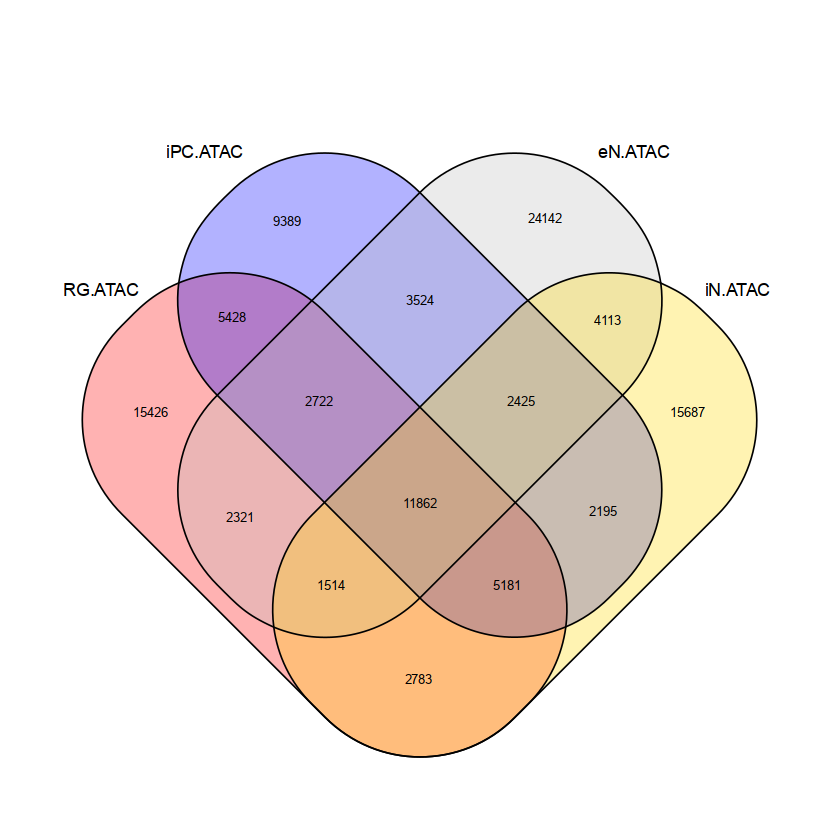

In [64]:
venn::venn(atacDIforveen,zcolor=c("red","blue","gray","gold"),box=F)

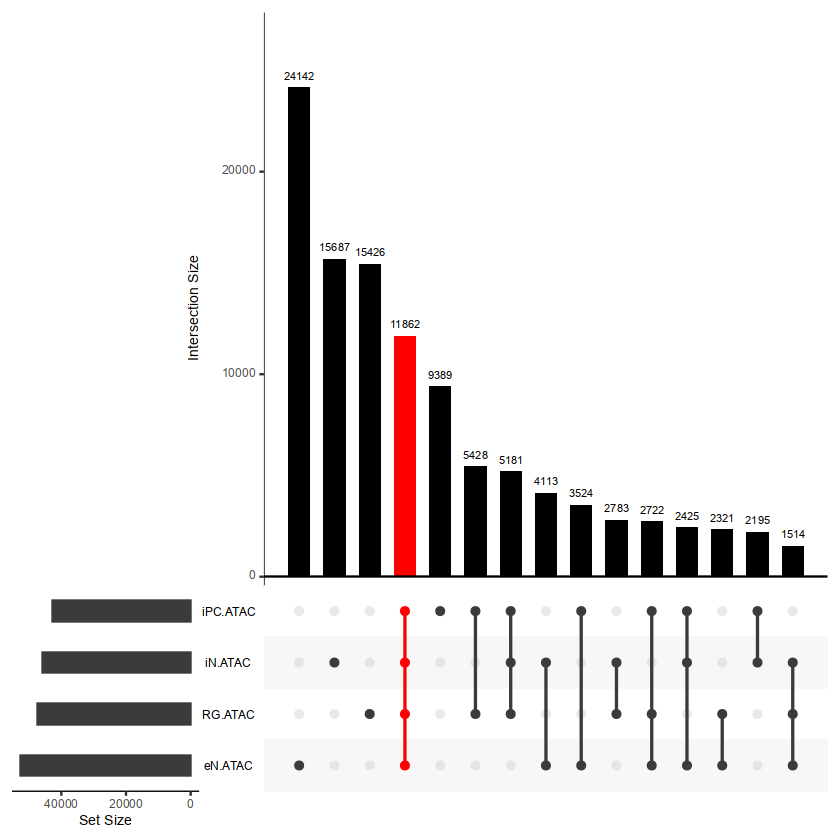

In [65]:
upset(fromList(atacDIforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG.ATAC","iPC.ATAC","eN.ATAC","iN.ATAC"), 
                          color = "red", active = T))) 

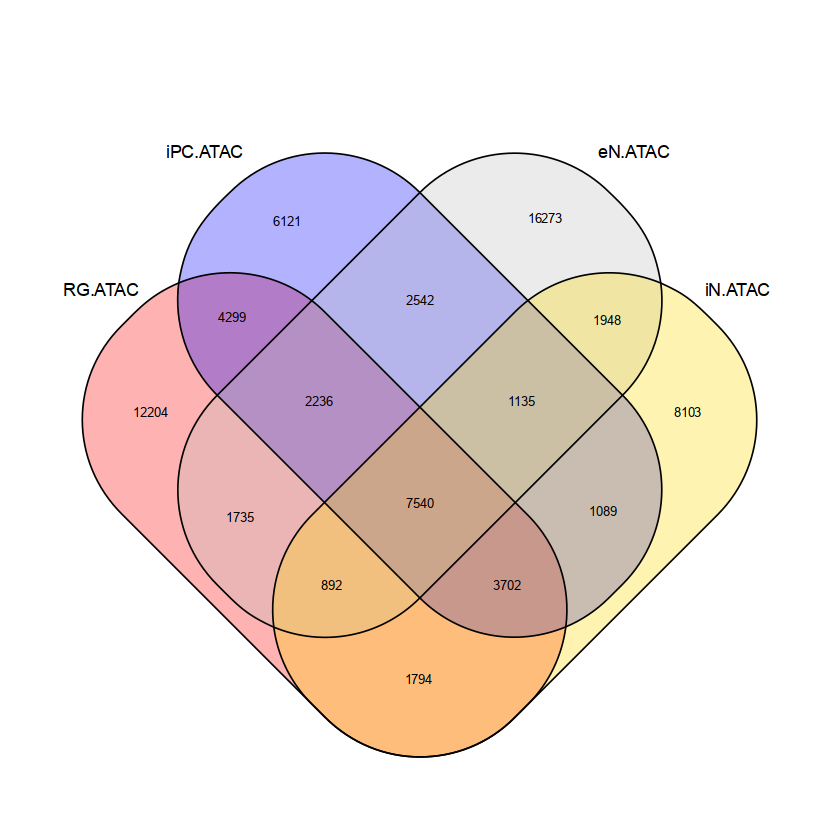

In [66]:
venn::venn(atacINforveen,zcolor=c("red","blue","gray","gold"),box=F)

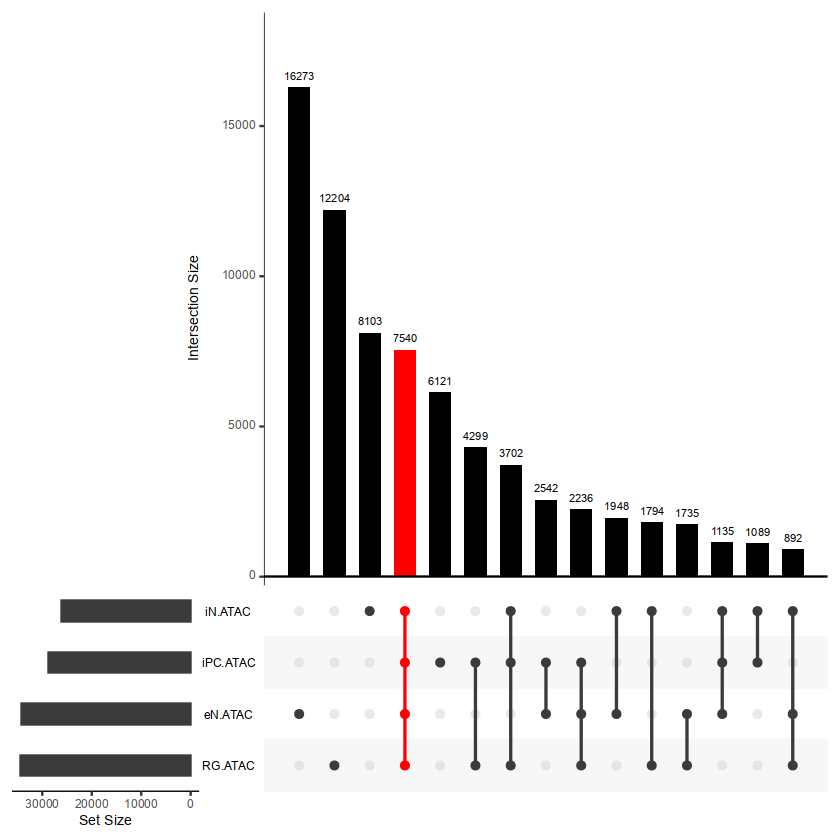

In [67]:
upset(fromList(atacINforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 4,
      queries = list(list(query = intersects, params = list("RG.ATAC","iPC.ATAC","eN.ATAC","iN.ATAC"), 
                          color = "red", active = T))) 

In [134]:
write.table(RG.atac.ls$`Distal Intergenic`,"./publicdata/human-shenyin-ATAC/RG.hg19peak.FDR.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
write.table(iPC.atac.ls$`Distal Intergenic`,"./publicdata/human-shenyin-ATAC/iPC.hg19peak.FDR.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
write.table(eN.atac.ls$`Distal Intergenic`,"./publicdata/human-shenyin-ATAC/eN.hg19peak.FDR.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)
write.table(iN.atac.ls$`Distal Intergenic`,"./publicdata/human-shenyin-ATAC/iN.hg19peak.FDR.Chipseeker.DistalIntergenic",col.names = F,row.names = F,sep="\t",quote = F)

In [135]:
write.table(RG.atac.ls$`Intron `,"./publicdata/human-shenyin-ATAC/RG.hg19peak.FDR.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
write.table(iPC.atac.ls$`Intron `,"./publicdata/human-shenyin-ATAC/iPC.hg19peak.FDR.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
write.table(eN.atac.ls$`Intron `,"./publicdata/human-shenyin-ATAC/eN.hg19peak.FDR.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)
write.table(iN.atac.ls$`Intron `,"./publicdata/human-shenyin-ATAC/iN.hg19peak.FDR.Chipseeker.Intron",col.names = F,row.names = F,sep="\t",quote = F)

# Compare with ShenYin ATAC-seq data

In [103]:
All.list <- list(RG=RGls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     iPC=iPCls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     eN=eNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     iN=iNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     RG.ATAC=RG.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
           iPC.ATAC=iPC.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
           eN.ATAC=eN.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
           iN.ATAC=iN.atac.ls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique())

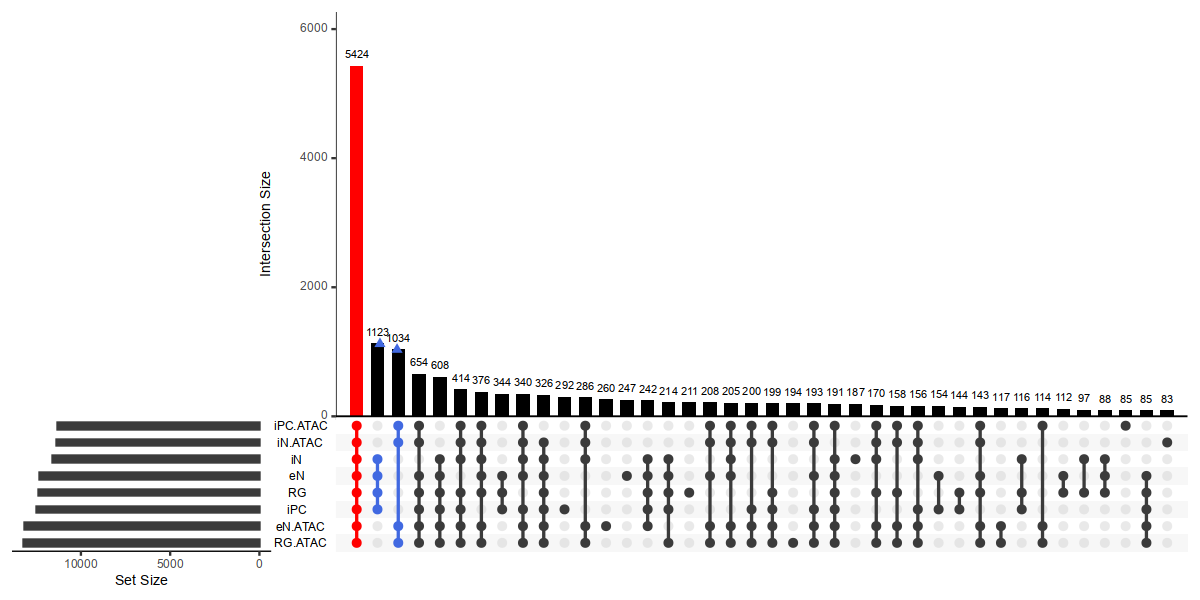

In [104]:
options(repr.plot.width=10,repr.plot.height=5)
upset(fromList(All.list), order.by = "freq", 
      main.bar.color = "black", nsets = 8,
      queries = list(list(query = intersects, params = list("RG","iPC","eN","iN","RG.ATAC","iPC.ATAC","eN.ATAC","iN.ATAC"), 
                          color = "red", active = T),
                     list(query = intersects, params = list("RG","iPC","eN","iN"), 
                          color = "royalblue", active = F),
                     list(query = intersects, params = list("RG.ATAC","iPC.ATAC","eN.ATAC","iN.ATAC"), 
                          color = "royalblue", active = F))) 

In [105]:
ATAC.DI.ls <- list.files("./publicdata/human-shenyin-ATAC/",pattern=".hg19peak.FDR.Chipseeker.DistalIntergenic.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.DistalIntergenic.addNR")
ATAC.IN.ls <- list.files("./publicdata/human-shenyin-ATAC/",pattern=".hg19peak.FDR.Chipseeker.Intron.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.Intron.addNR")
ATAC.DI <- lapply(paste0("./publicdata/human-shenyin-ATAC/",ATAC.DI.ls),read.table)
ATAC.IN <- lapply(paste0("./publicdata/human-shenyin-ATAC/",ATAC.IN.ls),read.table)
names(ATAC.DI) <- gsub(".hg19peak.FDR.Chipseeker.DistalIntergenic.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.DistalIntergenic.addNR","",ATAC.DI.ls)
names(ATAC.IN) <- gsub(".hg19peak.FDR.Chipseeker.DistalIntergenic.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.Intron.addNR","",ATAC.IN.ls)

In [106]:
SC.DI.ls <- list.files("./FINAL_res_files/humanBrain_1K_PFC/",pattern=".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.DistalIntergenic.addNR")
SC.IN.ls <- list.files("./FINAL_res_files/humanBrain_1K_PFC/",pattern=".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.Intron.addNR")
SC.DI <- lapply(paste0("./FINAL_res_files/humanBrain_1K_PFC/",SC.DI.ls),read.table)
SC.IN <- lapply(paste0("./FINAL_res_files/humanBrain_1K_PFC/",SC.IN.ls),read.table)
names(SC.DI) <- gsub(".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.DistalIntergenic.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.DistalIntergenic.addNR","",SC.DI.ls)
names(SC.IN) <- gsub(".mergeTocall.peak.FDR.filtered.narrowPeaks.Chipseeker.Intron.in.shenYinATAC.humanBrain1K_PFC.mergeFDRFilterpeaks.allcellTypes.Intron.addNR","",SC.IN.ls)

In [107]:
SC.AT.DIforveen <- list(
     RG.ATAC=ATAC.DI$RG$V9 %>% unique(),
     iPC.ATAC=ATAC.DI$iPC$V9 %>% unique(),
     eN.ATAC=ATAC.DI$eN$V9 %>% unique(),
     iN.ATAC=ATAC.DI$iN$V9 %>% unique(),
     RG.SCOPEC=SC.DI$RG$V11 %>% unique(),
     iPC.SCOPEC=SC.DI$iPC$V11 %>% unique(),
     eN.SCOPEC=SC.DI$eN$V11 %>% unique(),
     iN.SCOPEC=SC.DI$iN$V11 %>% unique())

In [108]:
SC.AT.INforveen <- list(
     RG.ATAC=ATAC.IN$RG$V8 %>% unique(),
     iPC.ATAC=ATAC.IN$iPC$V8 %>% unique(),
     eN.ATAC=ATAC.IN$eN$V8 %>% unique(),
     iN.ATAC=ATAC.IN$iN$V8 %>% unique(),
     RG.SCOPEC=SC.IN$RG$V10 %>% unique(),
     iPC.SCOPEC=SC.IN$iPC$V10 %>% unique(),
     eN.SCOPEC=SC.IN$eN$V10 %>% unique(),
     iN.SCOPEC=SC.IN$iN$V10 %>% unique())

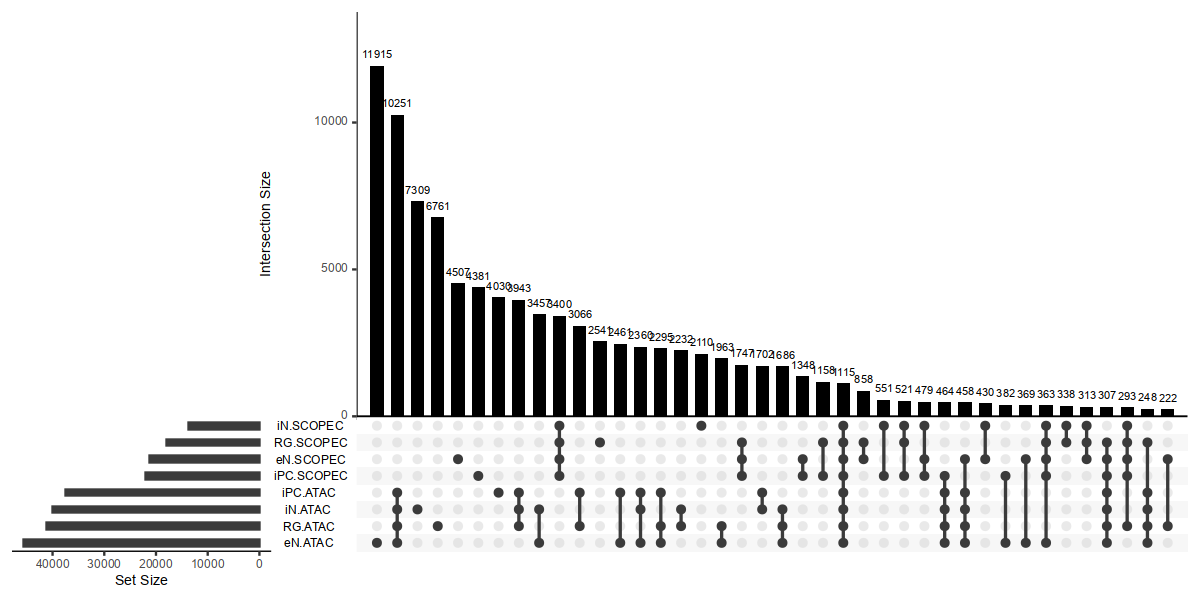

In [109]:
upset(fromList(SC.AT.DIforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 8) 

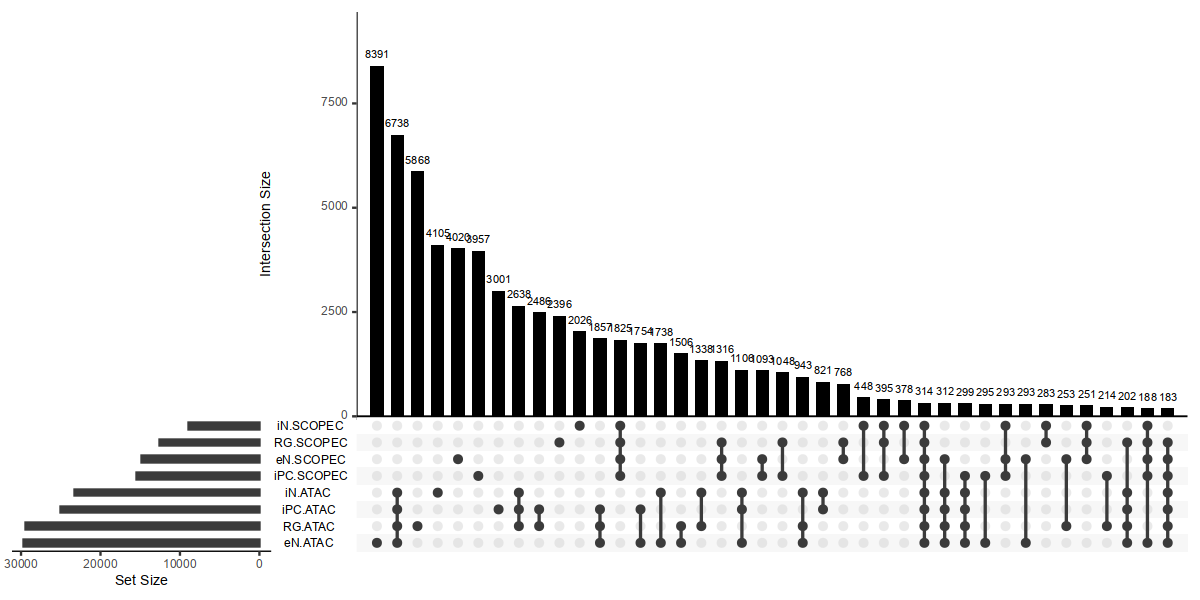

In [110]:
upset(fromList(SC.AT.INforveen), order.by = "freq", 
      main.bar.color = "black", nsets = 8) 

# Compare PFC V1

In [9]:
PFC.V1.P1KLs <- list(PFC.RG=PFC.RGls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     PFC.iPC=PFC.iPCls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     PFC.eN=PFC.eNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     PFC.iN=PFC.iNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     V1.RG=V1.RGls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     V1.iPC=V1.iPCls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     V1.eN=V1.eNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique(),
     V1.iN=V1.iNls$`Promoter (<=1kb)` %>% .$SYMBOL %>% unique())

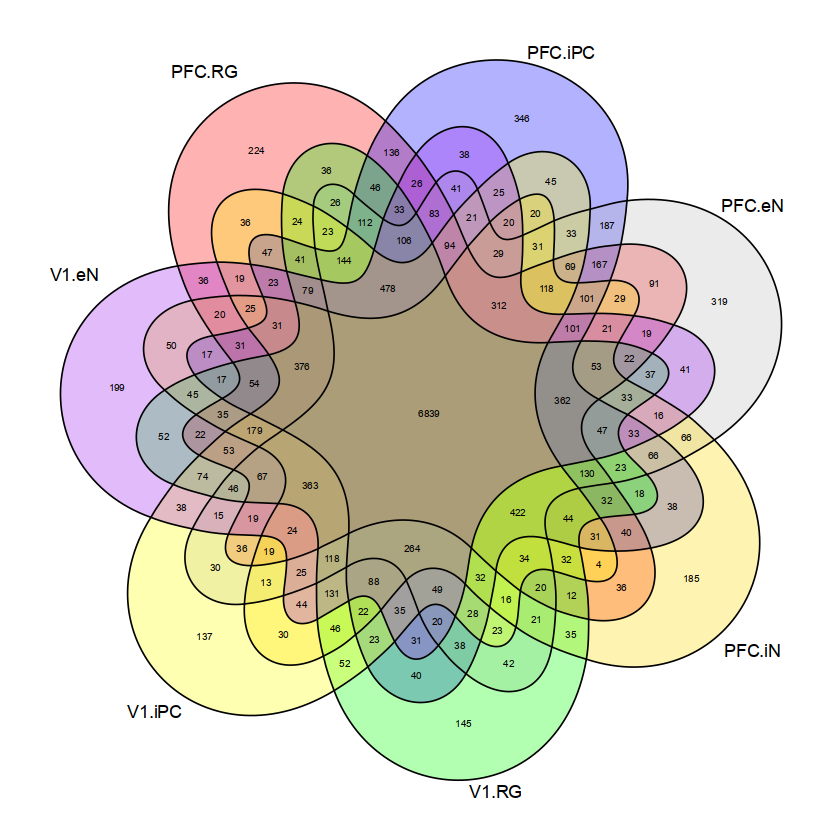

In [10]:
venn(PFC.V1.P1KLs,zcolor=c("red","blue","gray","gold","green","yellow","purple","pink"),box=F)

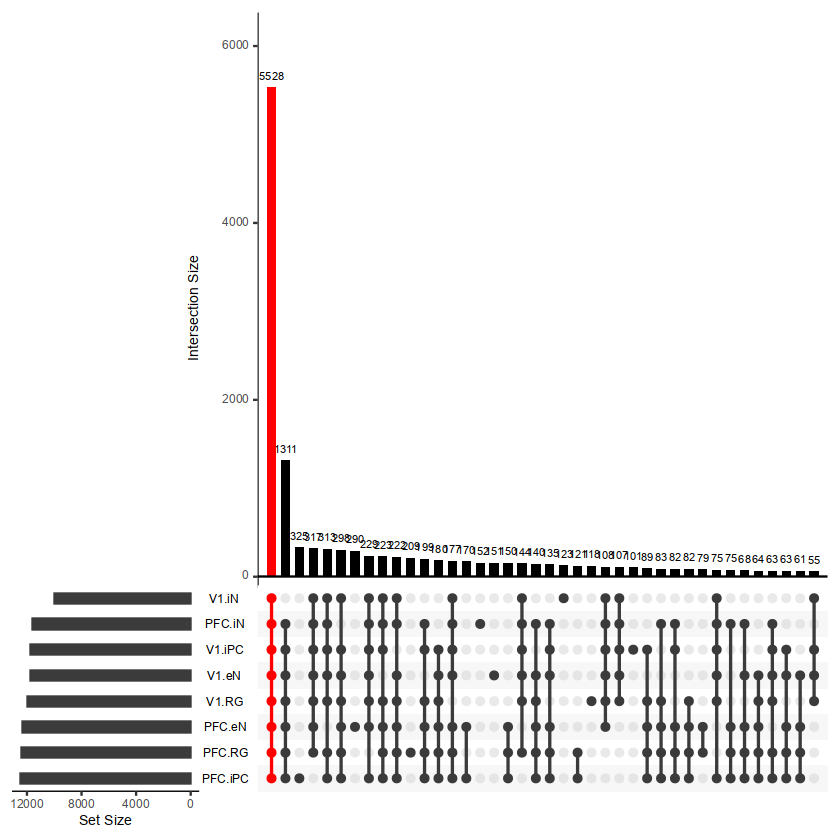

In [11]:
upset(fromList(PFC.V1.P1KLs), order.by = "freq", 
      main.bar.color = "black", nsets = 8,
      queries = list(list(query = intersects, params = list("PFC.RG","PFC.iPC","PFC.eN","PFC.iN",
                                                            "V1.RG","V1.iPC","V1.eN","V1.iN"), 
                          color = "red", active = T))) 